<a href="https://colab.research.google.com/github/sonalsrivas/Attendance-Project/blob/master/CALCULATION_RS_2_P_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Random Forest algorithm** is a kind of bootstrapping ensemble learning where not one but many machine learning models are used to arrive at a more accurate model.


*A FANTASTIC INTRO HERE - https://towardsdatascience.com/random-forest-and-its-implementation-71824ced454f*

Ensemble Learning-> Boosting and Bootstraping



In [1]:
import os
from google.colab import drive
#drive.mount('/content/gdrive')
#print(os.listdir(r'/content/gdrive/My Drive'))
drive.mount('/content/gdrive')
print(os.listdir(r'/content/gdrive/My Drive/Colab Notebooks'))


# Importing the libraries
import numpy as np
import pandas as pd

#Importing Data
#data1=pd.read_excel("/content/gdrive/My Drive/Concrete Data-Stone-Dust.xlsx")
#data1=pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/Concrete Data-Stone-Dust.xlsx")
#data1=pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Concrete Data-Stone-Dust-NEW.csv")
#data1=pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/basicshit.xlsx")
data1=pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/Copy of CALCULATION-RS-2-P.xlsx")
#### CAN BE CHANGED
data1.columns = ['displacementPerThickness','poissonsratio','sheerMod','l_ficsss', 'up_foundMod','lo_foundMod','geoParam','loadQ']


Mounted at /content/gdrive
['Conversion Word Problems.ipynb', 'General.ipynb', 'Numeral Unit Separation.ipynb', 'ConversionWordProblemsMP.ipynb', 'Untitled', 'Untitled0.ipynb', 'NumeralUnitSeparationMP.ipynb', 'main.ipynb', 'Copy of main.ipynb', 'Word Number.ipynb', 'Corrected Main2.ipynb', 'type of series Program.ipynb', 'Up and Running Main.ipynb', 'TwitterSentiment_AV_test_tweets_anuFYb8.csv', 'TwitterSentiment_AV_train_E6oV3lV.csv', 'Untitled1.ipynb', 'TwitterSentimentAnalysiswithTFIDF.ipynb', 'Tetris Project.ipynb', 'Untitled2.ipynb', 'Untitled3.ipynb', 'codechef july challenge 2020 practice.ipynb', 'Garvit Solution.ipynb', 'Untitled4.ipynb', 'introqcqh-lab-1.zip', 'lab-1.ipynb', 'Untitled5.ipynb', 'Sept2020 Codechef Long.ipynb', 'DATA-RS-1-BLANK.gsheet', 'DATA-RS-1-BLANK - Table.csv', 'DATA-RS-1-BLANK - Table.gsheet', 'Dad ANN.xlsx', 'ANN classification Dads Data.ipynb', 'ANN labelled-weak.ipynb', '  -Copy of Random Forest -Copy of ANN labelled-weak.ipynb', 'Concrete_Data.xls', '

In [2]:
data1.fillna(0)
print("Number of rows    :",data1.shape[0])
print("Number of columns :",data1.shape[1])
#for colname in data1.columns:
#  for val in data1[colname]:
#    if type(val) != (float):
#      print(colname, type(val))
#  print(f"checked {colname}")

Number of rows    : 580
Number of columns : 8


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Parameters of train_test_split
**test_size**: to specify the percentage of data instances taken as test divided by 100; default is 0.25

**random_state**: an integer explicitely passed here would lead to you having a reproducible splitting of the dataset; not specifying this argument would lead to it being set to np.random.RandomState which is a mersenne twister.


In [5]:
dataSet=data1
#Splitting train and test data
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
train,test = train_test_split(dataSet, test_size = 0.3, random_state = 123)
train_X = train[[x for x in train.columns if x not in ["loadQ"]]]# + ["age_months"]]]
train_Y = train["loadQ"]
test_X  = test[[x for x in test.columns if x not in ["loadQ"]]]# + ["age_months"]]]
test_Y  = test["loadQ"]

## Libraries for plot graph presentation

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

**Mean Squared Error (MSE)** : the mean squared difference between the estimated values and the actual value.

**R square score** : the proportion of the variance in the dependent variable that is predictable from the independent variable.

**What is a good r2 score?**
It depends on your research work but more then 50%, R2 value with low RMES value is acceptable to scientific research community, Results with low R2 value of 25% to 30% are valid because it represent your findings.

--------------------------------------------

**RandomForestRegressor Parameter**

n_estimator : specifies the number of decision trees in the random forest; default value is 100.

--------------------------------------------

**plt.figure Parameter**

figsize: specify widh and height in inches




train error:
R2	: 1.00 
RMS	: 69.12337688425471 

test error:
R2	: 0.99 
RMS	: 127.09963063981127 

comparision b/w predicted value and actual test value 


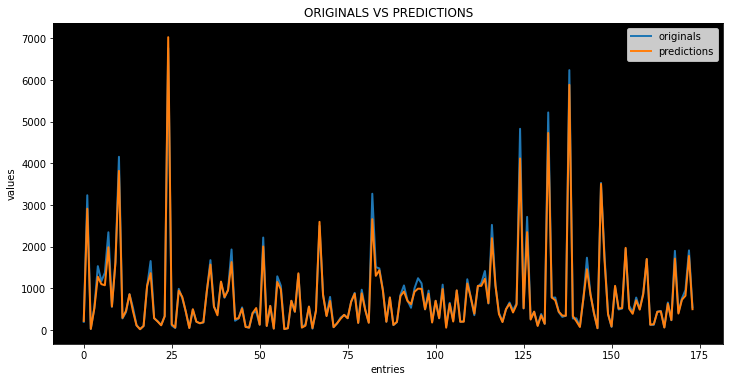

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
model = RandomForestRegressor(n_estimators=200, n_jobs=-1)
model.fit(train_X,train_Y)

predict_train_Y= model.predict(train_X)
r2score=("%.2f" % r2_score(train_Y,predict_train_Y))
rms=np.sqrt(mean_squared_error(train_Y,predict_train_Y))
print("train error:\nR2\t:",r2score,"\nRMS\t:",rms,"\n")

predict_test_Y= model.predict(test_X)
r2score=("%.2f" % r2_score(test_Y,predict_test_Y))
rms=np.sqrt(mean_squared_error(test_Y,predict_test_Y))
print("test error:\nR2\t:",r2score,"\nRMS\t:",rms,"\n")

print("comparision b/w predicted value and actual test value ")

plt.figure(figsize=(13,28))
plt.subplot(211)
prediction = pd.DataFrame(predict_test_Y)  
testy = test_Y.reset_index()["loadQ"]
    
ax = testy.plot(label="originals",figsize=(12,13),linewidth=2)
ax = prediction[0].plot(label = "predictions",figsize=(12,13),linewidth=2)

plt.legend(loc="best")
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("entries")
plt.ylabel("values")
ax.set_facecolor("k")

Comparision between Predicted value and Actual test value 


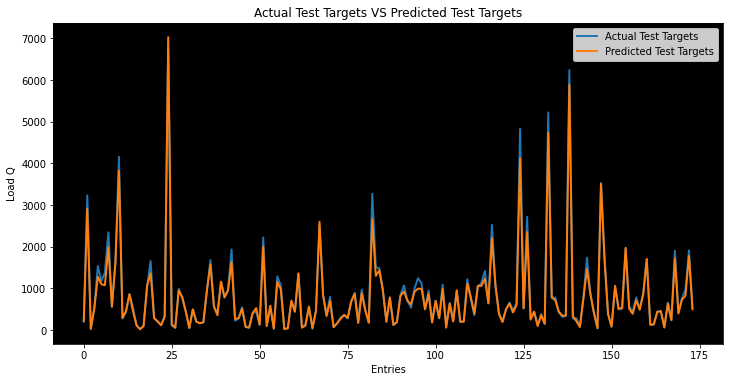

In [9]:

print("Comparision between Predicted value and Actual test value ")

plt.figure(figsize=(13,28))
plt.subplot(211)
prediction = pd.DataFrame(predict_test_Y)  
testy = test_Y.reset_index()["loadQ"]
   
ax = testy.plot(label="Actual Test Targets",figsize=(12,13),linewidth=2)
ax = prediction[0].plot(label = "Predicted Test Targets",figsize=(12,13),linewidth=2)

plt.legend(loc="best")
plt.title("Actual Test Targets VS Predicted Test Targets")
plt.xlabel("Entries")
plt.ylabel("Load Q")
ax.set_facecolor("k")

In [10]:
'''
inputName=["cement","furnace_slag","fly_ash","water","super_plasticizer","coarse_agg","fine_agg","age"]
new=[]
for i in inputName:
  print(i,":",end='\t\t\t\t')
  new.append(float(input()))
new_X=np.array(new).reshape(1,-1)
predict_new_Y = xgr.predict(new_X)
print("Predicted Compressive Strength of Concrete => ",predict_new_Y)
'''

'\ninputName=["cement","furnace_slag","fly_ash","water","super_plasticizer","coarse_agg","fine_agg","age"]\nnew=[]\nfor i in inputName:\n  print(i,":",end=\'\t\t\t\t\')\n  new.append(float(input()))\nnew_X=np.array(new).reshape(1,-1)\npredict_new_Y = xgr.predict(new_X)\nprint("Predicted Compressive Strength of Concrete => ",predict_new_Y)\n'

## **Predict Concrete Strength**

In [11]:
'''
labels=['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer','coarse_agg', 'fine_agg', 'age']
s=input().split(' ')
s1 = pd.Series([float(s[0])], name='cement')
s2 = pd.Series([float(s[1])], name='furnace_slag')
s3 = pd.Series([float(s[2])], name='fly_ash')
s4 = pd.Series([float(s[3])], name='water')
s5 = pd.Series([float(s[4])], name='super_plasticizer')
s6 = pd.Series([float(s[5])], name='coarse_agg')
s7 = pd.Series([float(s[6])], name='fine_agg')
s8 = pd.Series([float(s[7])], name='stone_dust')
s9 = pd.Series([float(s[8])], name='age')
new = pd.concat([s1, s2, s3, s4, s5, s6, s7, s8,s9], axis=1)
predictions=xgr.predict(new)
#print("CEMENT STRENTH:\r")
print("Predicted Composite Concrete Strength =",predictions[0],"MPa")
'''

'\nlabels=[\'cement\', \'furnace_slag\', \'fly_ash\', \'water\', \'super_plasticizer\',\'coarse_agg\', \'fine_agg\', \'age\']\ns=input().split(\' \')\ns1 = pd.Series([float(s[0])], name=\'cement\')\ns2 = pd.Series([float(s[1])], name=\'furnace_slag\')\ns3 = pd.Series([float(s[2])], name=\'fly_ash\')\ns4 = pd.Series([float(s[3])], name=\'water\')\ns5 = pd.Series([float(s[4])], name=\'super_plasticizer\')\ns6 = pd.Series([float(s[5])], name=\'coarse_agg\')\ns7 = pd.Series([float(s[6])], name=\'fine_agg\')\ns8 = pd.Series([float(s[7])], name=\'stone_dust\')\ns9 = pd.Series([float(s[8])], name=\'age\')\nnew = pd.concat([s1, s2, s3, s4, s5, s6, s7, s8,s9], axis=1)\npredictions=xgr.predict(new)\n#print("CEMENT STRENTH:\r")\nprint("Predicted Composite Concrete Strength =",predictions[0],"MPa")\n'

In [12]:
#train_X =pd.DataFrame(train_X)
#test_X =pd.DataFrame(test_X)

#train_Y =pd.DataFrame(train_Y)
#test_Y =pd.DataFrame(test_Y)

pred_train_Y =pd.DataFrame(predict_train_Y)
pred_test_Y = pd.DataFrame(predict_test_Y)


XX=pd.concat([train_X,test_X],ignore_index=True)
YY=pd.concat([train_Y,test_Y],ignore_index=True)
RR=pd.concat([pred_train_Y,pred_test_Y],ignore_index=True)

#XX.columns = ['cement','blast_furnace','fly_ash','water', 'superplasticizer','coarse_agg','fine_agg','stone_dust','age']#,'strength']
XX.columns = ['displacementPerThickness','poissonsratio','sheerMod','l_ficsss', 'up_foundMod','lo_foundMod','geoParam']
XX['Experimental_Q']=YY
XX['Predicted_Q']=RR

XX.to_csv("prediction_results_Q_RF.csv")

In [13]:
predicted_data1=pd.read_csv("/content/prediction_results_Q_RF.csv")

Text(0.5, 0, 'Experimental_Result')

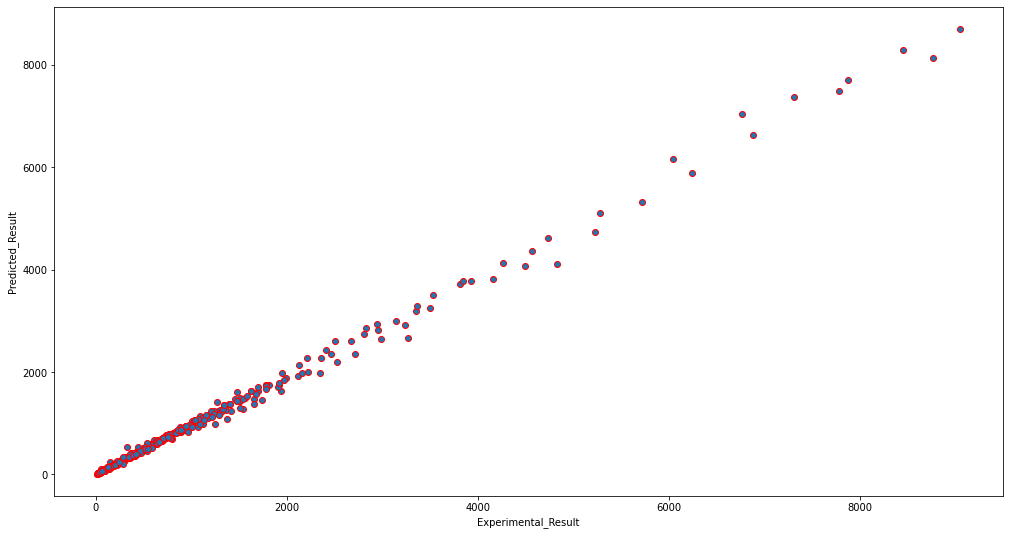

In [14]:
# scatter plot of Concrete Strength Experimented and XGPredicted
plt.figure(figsize=[17,9])
plt.scatter(y='Predicted_Q',x='Experimental_Q',edgecolors='red',data=predicted_data1)
plt.ylabel('Predicted_Result')
plt.xlabel('Experimental_Result')


###**Identify outliers in data**

In [15]:
print("Number of rows    :",predicted_data1.shape[0])
print("Number of columns :",predicted_data1.shape[1])

Number of rows    : 580
Number of columns : 10


In [16]:
predicted_data1.head

<bound method NDFrame.head of      Unnamed: 0  displacementPerThickness  ...  Experimental_Q  Predicted_Q
0             0                       1.7  ...      778.591812   783.545129
1             1                       0.3  ...      155.394125   140.832560
2             2                       1.8  ...      785.164302   764.668681
3             3                       1.6  ...     1039.156236  1019.223325
4             4                       0.6  ...      150.533620   152.510875
..          ...                       ...  ...             ...          ...
575         575                       1.1  ...      423.960196   396.490658
576         576                       1.6  ...      758.787090   728.950748
577         577                       0.7  ...      961.220213   824.392886
578         578                       1.0  ...     1912.701210  1780.080054
579         579                       1.2  ...      543.629833   501.408426

[580 rows x 10 columns]>

In [17]:
predicted_data1=predicted_data1.drop(columns='Predicted_Q')

In [18]:
#predicted_data1=predicted_data1.drop(columns='Difference')

In [19]:
predicted_data1.head


<bound method NDFrame.head of      Unnamed: 0  displacementPerThickness  ...  geoParam  Experimental_Q
0             0                       1.7  ...       2.5      778.591812
1             1                       0.3  ...       5.0      155.394125
2             2                       1.8  ...       2.5      785.164302
3             3                       1.6  ...       2.5     1039.156236
4             4                       0.6  ...       2.5      150.533620
..          ...                       ...  ...       ...             ...
575         575                       1.1  ...       2.5      423.960196
576         576                       1.6  ...       2.5      758.787090
577         577                       0.7  ...       2.5      961.220213
578         578                       1.0  ...      10.0     1912.701210
579         579                       1.2  ...       2.5      543.629833

[580 rows x 9 columns]>

# ====================== DIAGRAMS ==========================


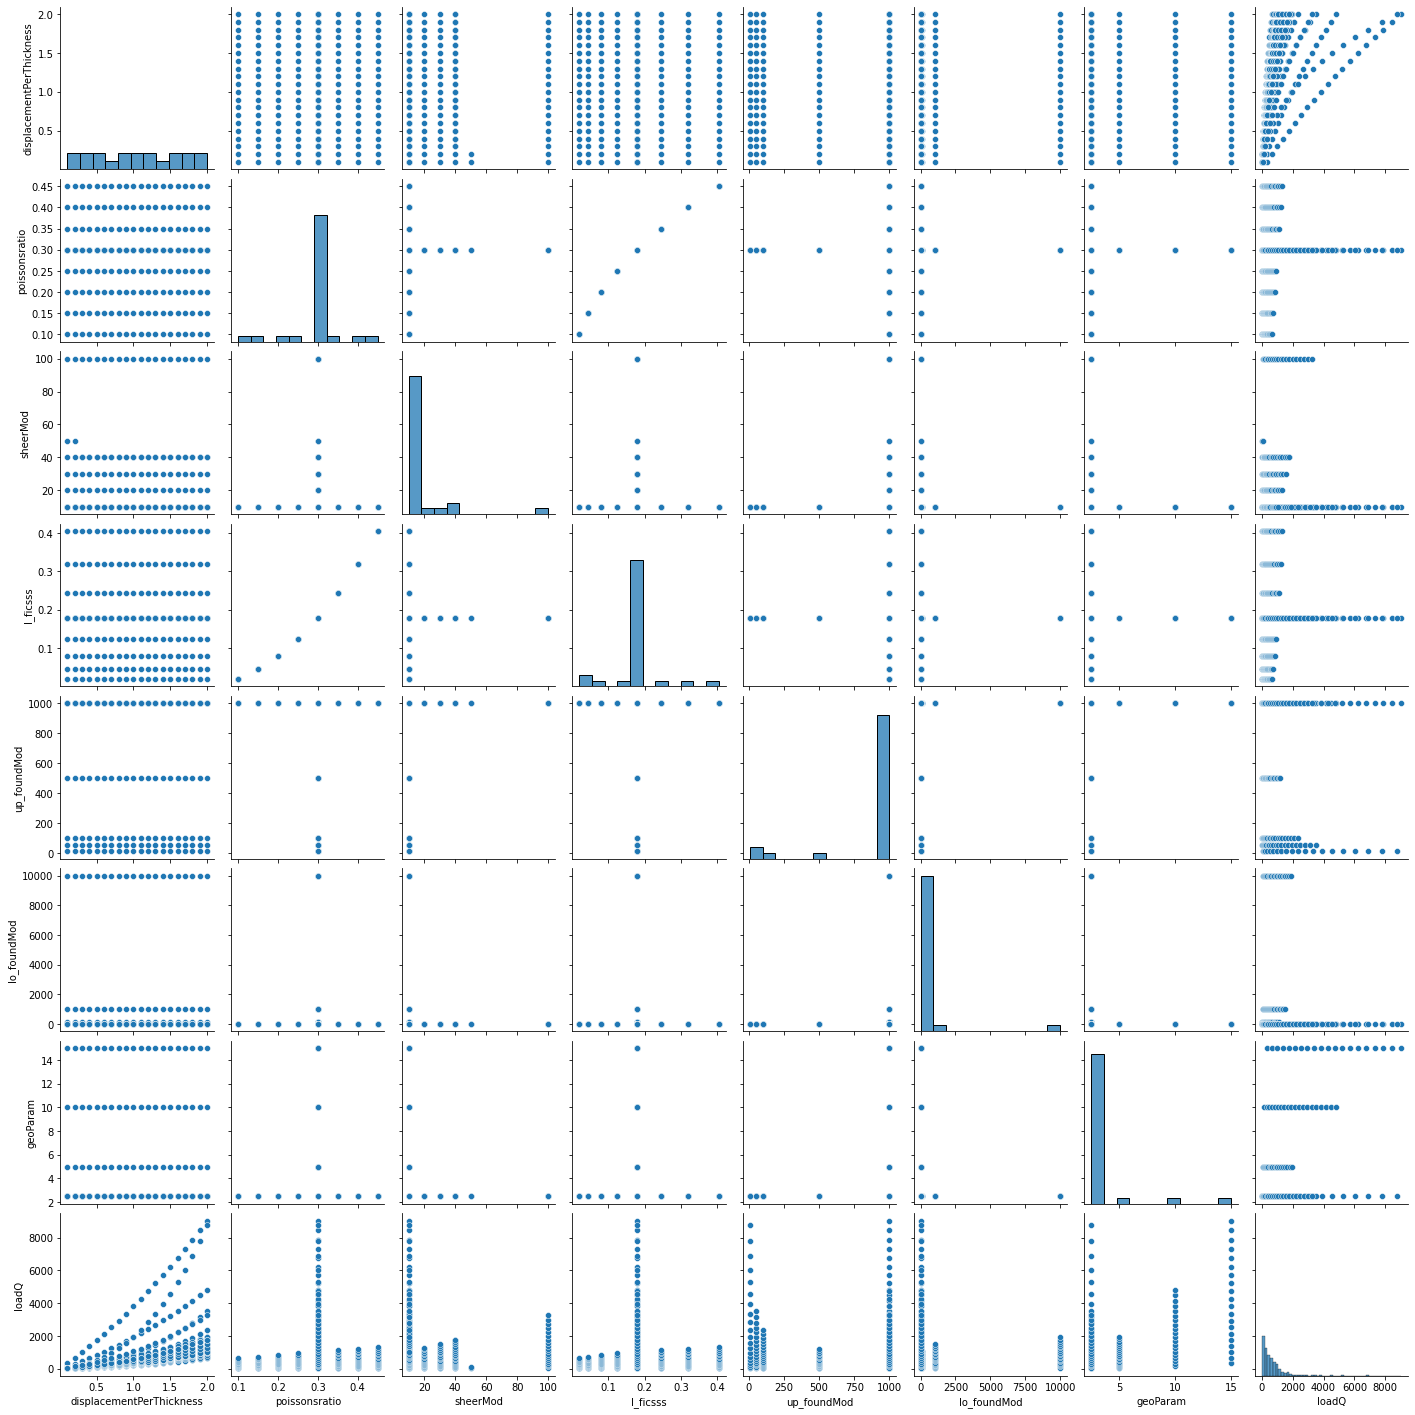

In [20]:
sns.pairplot(dataSet)

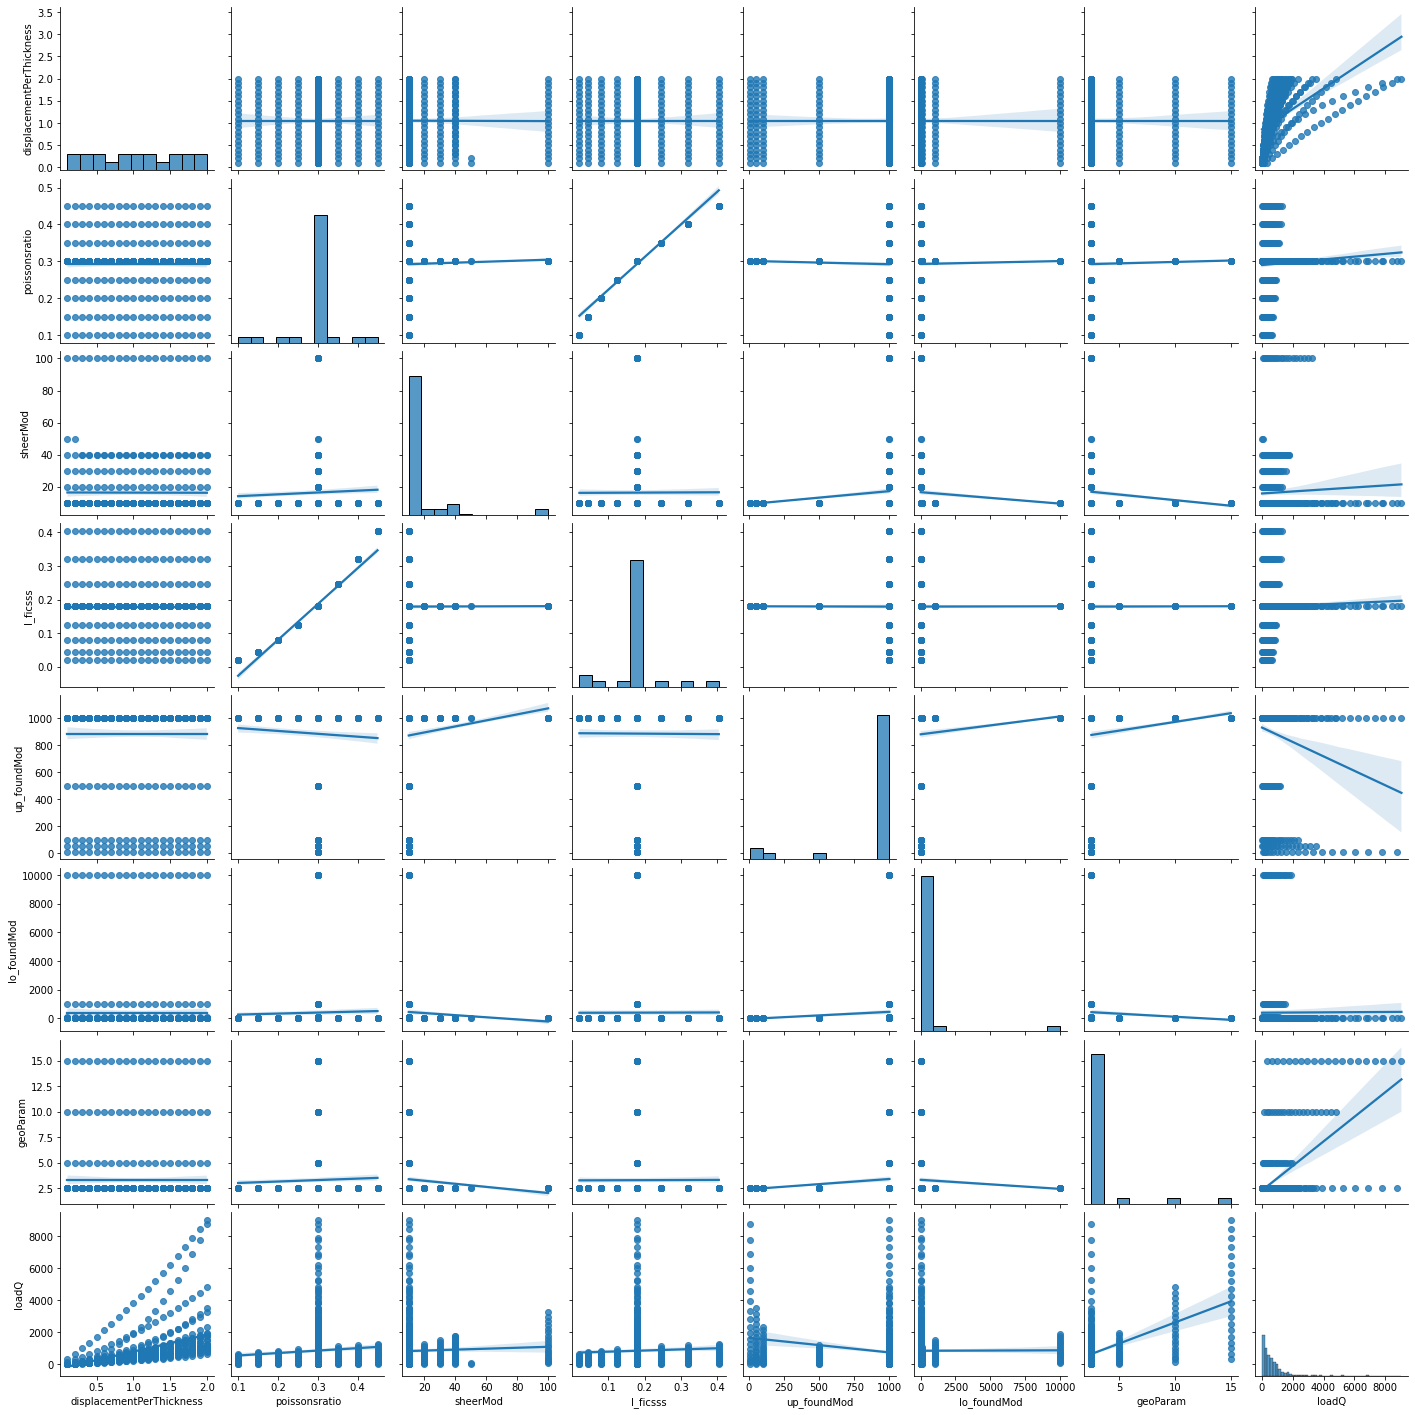

In [25]:
sns.pairplot(dataSet, kind='reg')

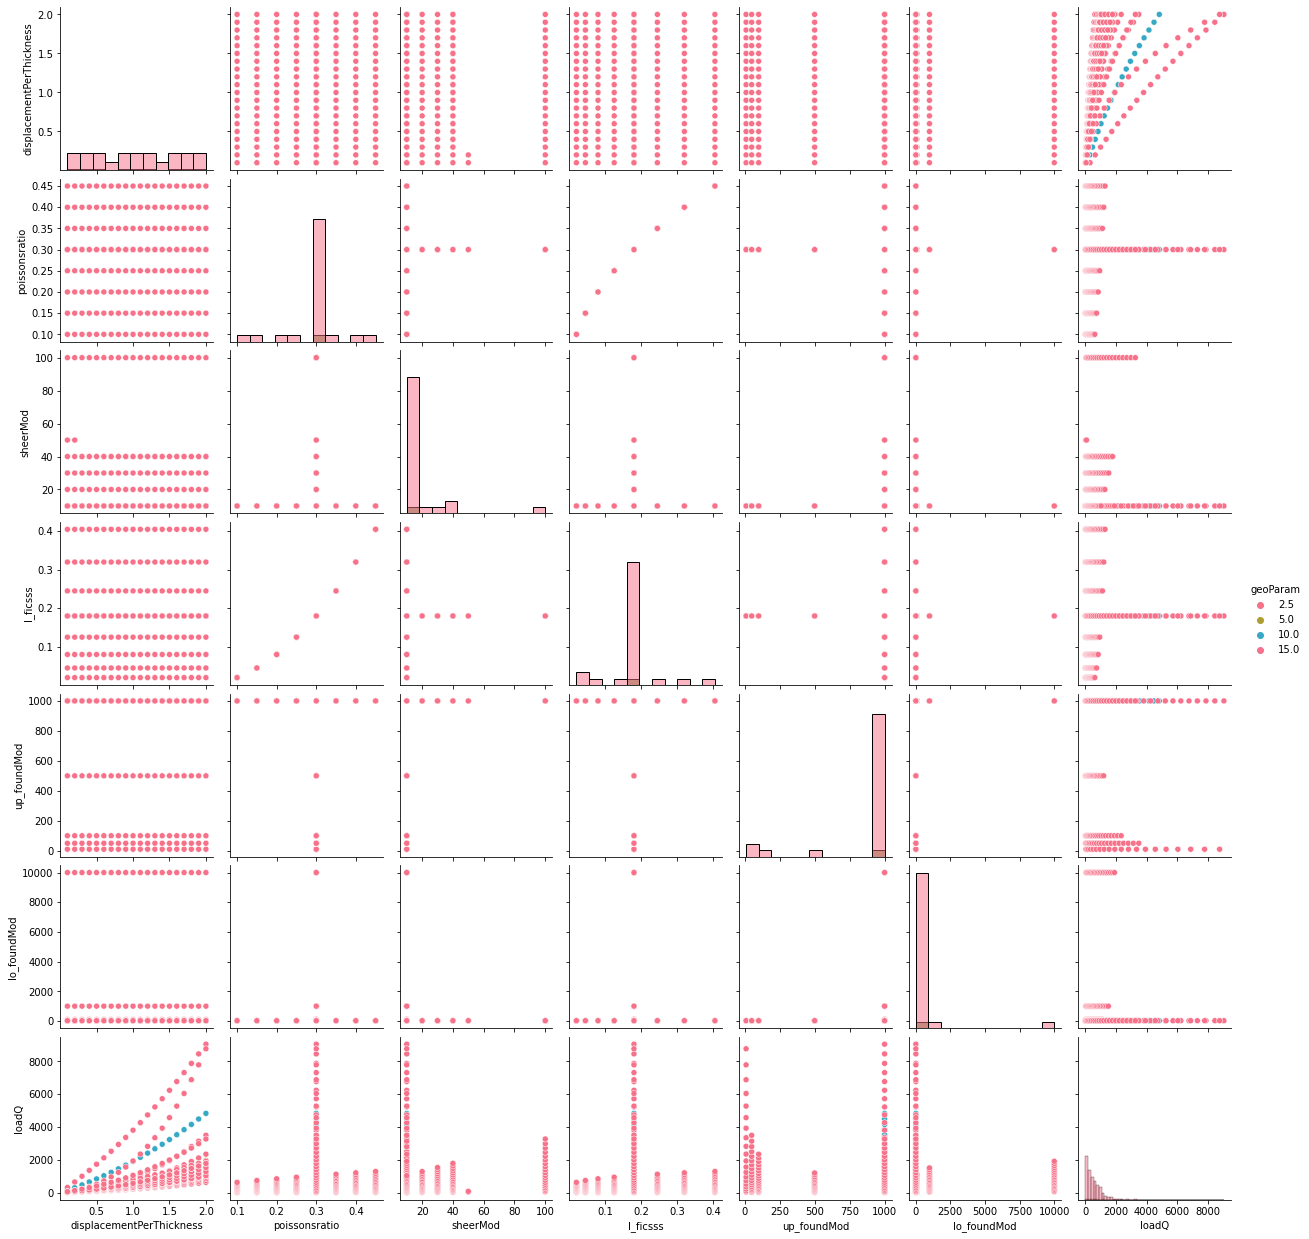

In [26]:
sns.pairplot(dataSet, hue="geoParam", palette="husl",diag_kind="hist")

https://seaborn.pydata.org/generated/seaborn.pairplot.html

Maybe show this to Dad, so that he may assess.


Use argument:-> var to select specific rows&cols for pairplot.

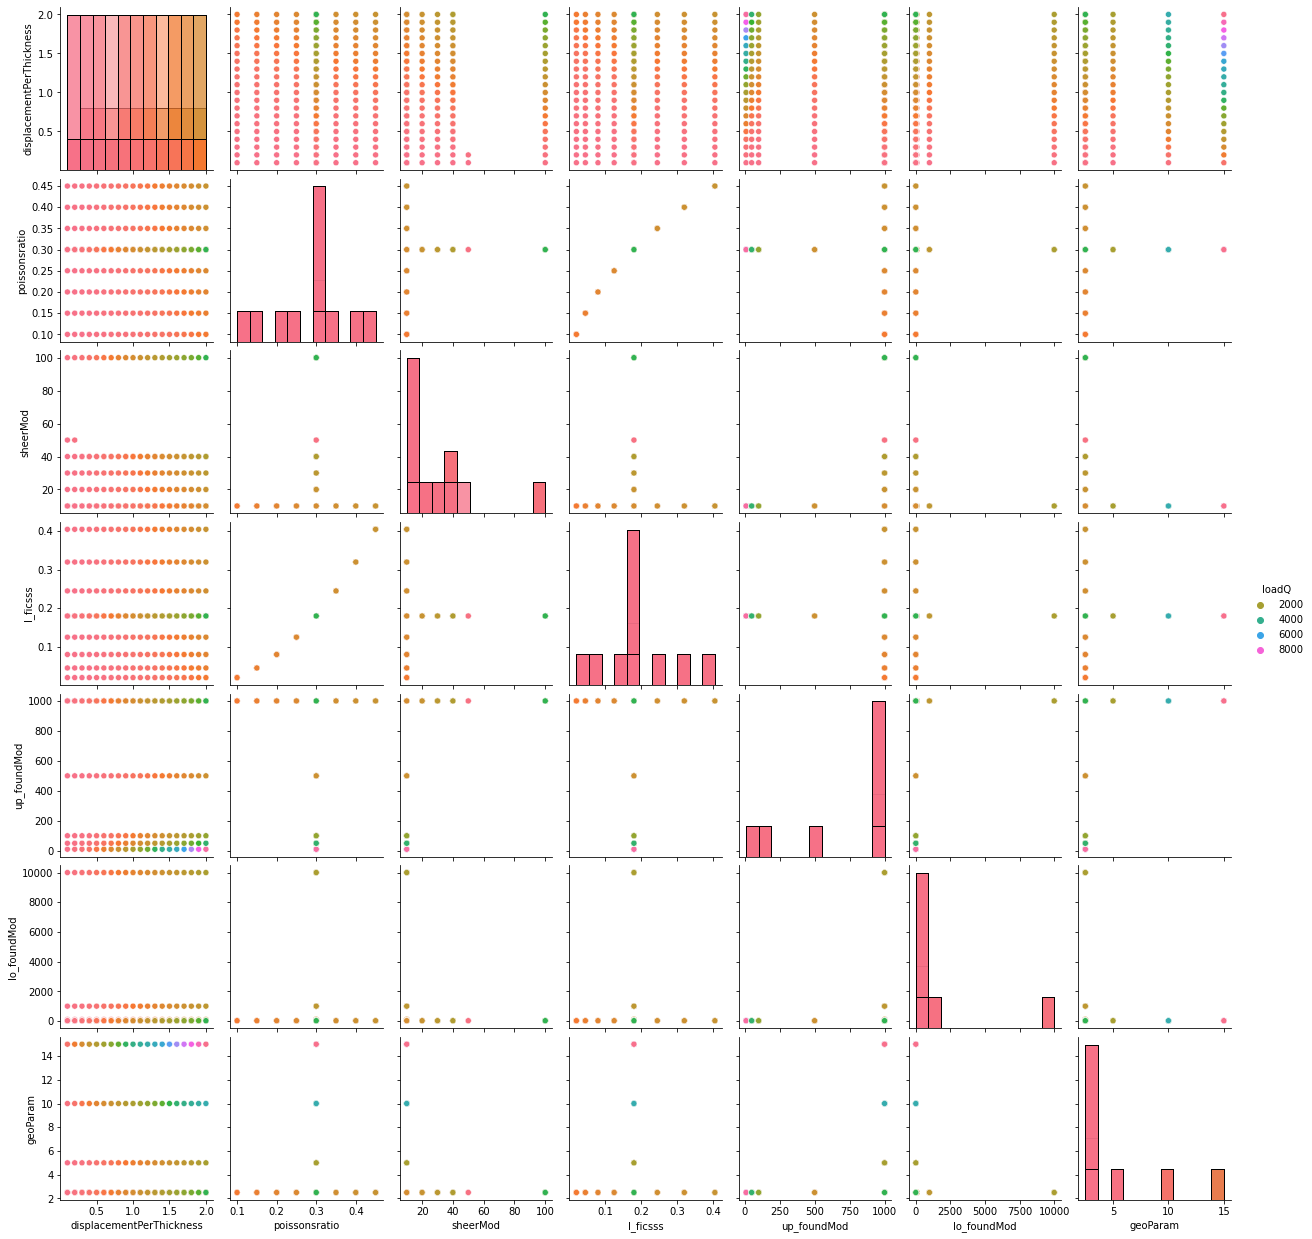

In [27]:
sns.pairplot(dataSet, hue="loadQ", palette="husl",diag_kind="hist")

Text(0.5, 0, 'shearMod')

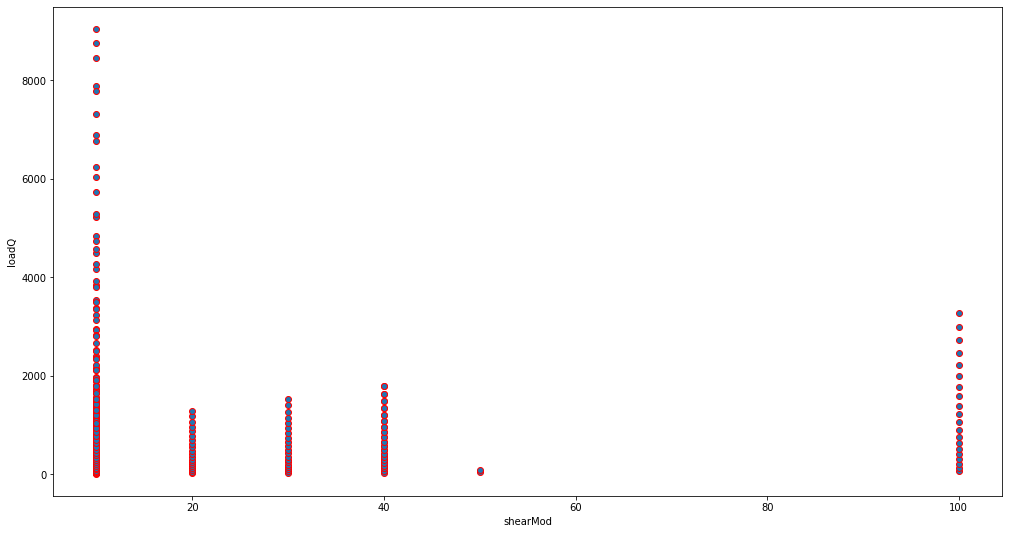

In [28]:
# scatter plot of Concrete Strength and Cement quantity
plt.figure(figsize=[17,9])
plt.scatter(y='loadQ',x='sheerMod',edgecolors='red',data=dataSet)
plt.ylabel('loadQ')
plt.xlabel('shearMod')

Text(0.5, 0, 'lo_foundMod')

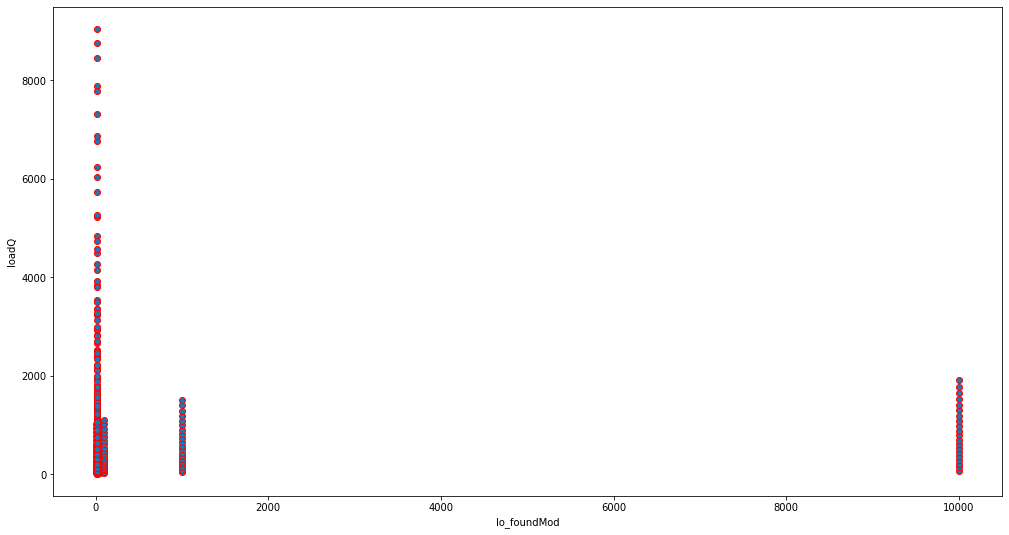

In [29]:
# scatter plot of Concrete Strength and Water quantity
plt.figure(figsize=[17,9])
plt.scatter(y='loadQ',x='lo_foundMod',edgecolors='red',data=dataSet)
plt.ylabel('loadQ')
plt.xlabel('lo_foundMod')


This scatter plot is same as the plot in the last row, 4th column in the pairplt matrix

"The below diagonal matrix is above DM with reversed axis."

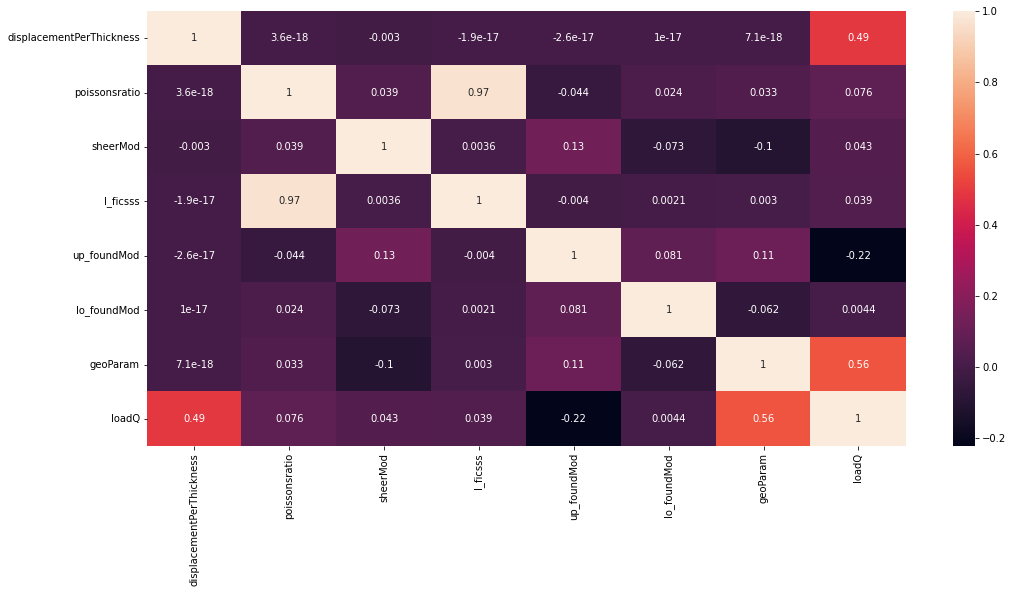

In [30]:
plt.figure(figsize=[17,8])

#ploting correlation plot

sns.heatmap(dataSet.corr(),annot=True)

The above numeric figures in the heatmap are correlation coefficent 

https://www.analyticsvidhya.com/blog/2021/01/beginners-guide-to-pearsons-correlation-coefficient/

https://towardsdatascience.com/all-about-heatmaps-bb7d97f099d7

Pearson's Correlation Coefficient - measure of the strength and direction of a linear correlation between two variables.

The value ranges [-1,+1] ; -1 means there is a negative correlation bewten the 2 variables(ie. the increase of one, leads to decrease of teh other) and 0 means no correlation and +1 means there is a positive correlation.

CHANGE color scheme with argument: cmap="YlGnBu"

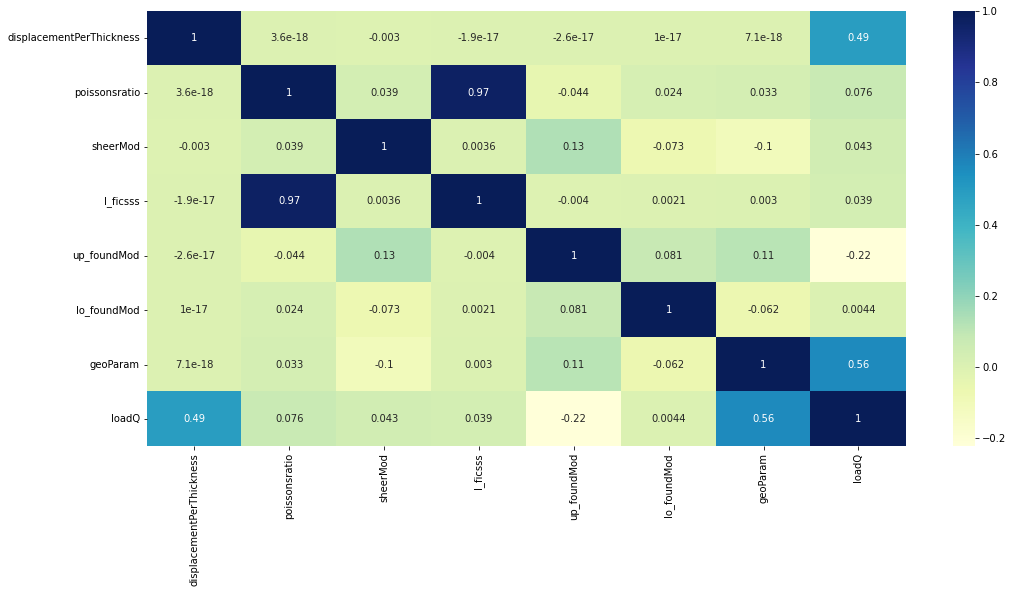

In [31]:
plt.figure(figsize=[17,8])

#ploting correlation plot

sns.heatmap(dataSet.corr(),annot=True, cmap="YlGnBu")

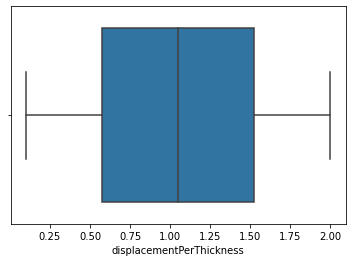

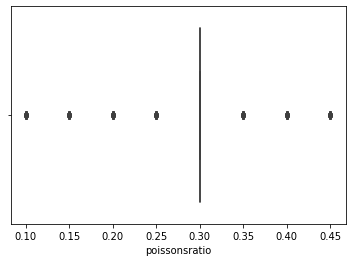

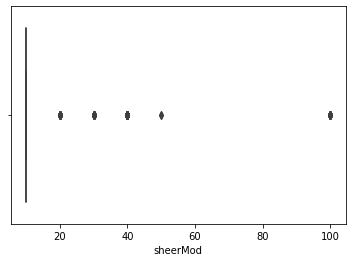

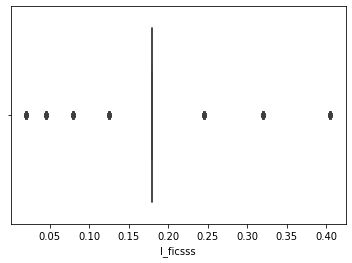

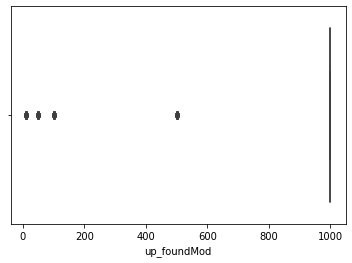

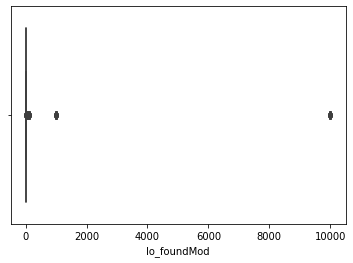

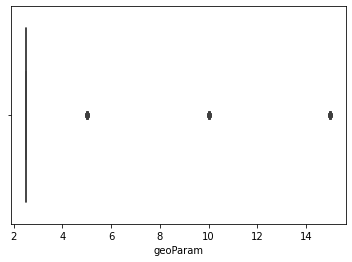

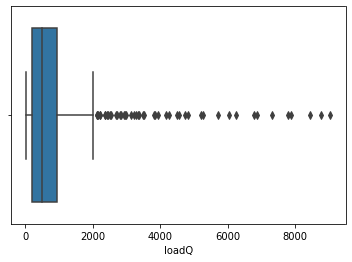

In [32]:
#l=['cement','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate','age','csMPa']
l=data1.columns
for i in l:
    sns.boxplot(x=dataSet[i])
    plt.show()

BOXPLOT

In [33]:
#Save Model
'''
import pickle
filename="loadQ_random_forest_model"
savedfile=pickle.dump(model, open(filename,'wb'))'''

'\nimport pickle\nfilename="loadQ_random_forest_model"\nsavedfile=pickle.dump(model, open(filename,\'wb\'))'

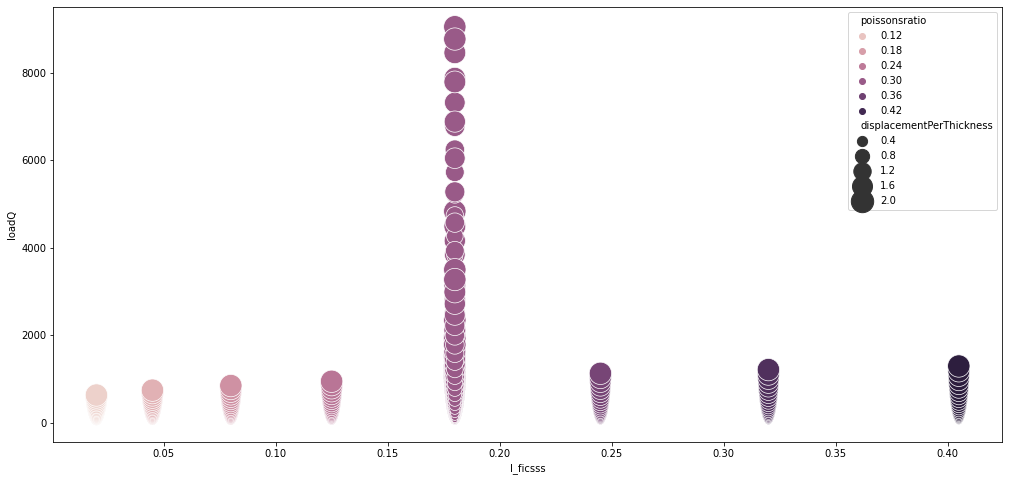

In [34]:
plt.figure(figsize=[17,8])
sns.scatterplot(y="loadQ", x="l_ficsss", hue="poissonsratio",size="displacementPerThickness", data=dataSet, sizes=(30,500))
# I don't think this is accurate figuring and this can be made more intuitive and better.

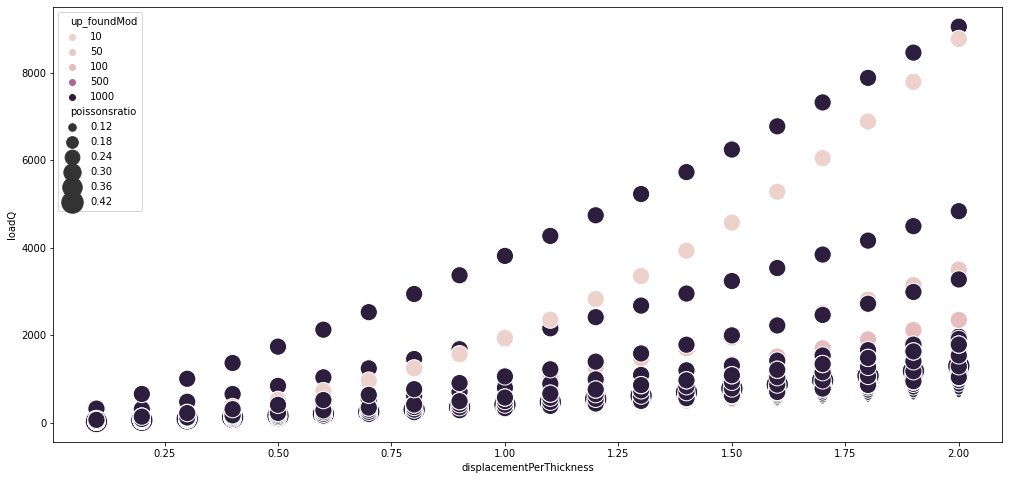

In [35]:
plt.figure(figsize=[17,8])
sns.scatterplot(y="loadQ", x="displacementPerThickness", hue="up_foundMod",size="poissonsratio", data=dataSet, sizes=(30,500))
# I don't think this is accurate figuring and this can be made more intuitive and better.

We seem to be lacking in data of the case where age is high, superPlasticizer is greater than 30.

This case could give a more clear picture since each of these features individually are known to increase concrete strength.